In [1]:
# Import necessary libraries and modules
import sys
sys.path.append("ACC_PROJECT")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from fastai.tabular.all import *
from dtreeviz.trees import *
import torch as t

# Import custom functions
from functions.model_evaluator import (
    evaluation,
) 

from functions.value_encoding import DataEncoder


# Load the dataset and select relevant columns
df = pd.read_csv("processed_data.csv", low_memory=False)
df.drop(columns="description", inplace=True)


# Check for GPU availability and set the device accordingly
device = "cuda" if t.cuda.is_available() else "cpu"


/Users/workaccount/Documents/coding/accounting_project/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Splitting the dataset into training and validation sets with stratification
df_wo_valid, df_valid = train_test_split(
    df, test_size=0.2, random_state=1, stratify=df.label
)
df_wo_valid = df_wo_valid.reset_index()
df_wo_valid.drop(columns="index", inplace=True)
df_valid = df_wo_valid.reset_index()
df_valid.drop(columns="index", inplace=True)


In [4]:
# Encoding categorical data for model training
encoder = DataEncoder(df)  # Initialize with the entire dataset
encoded_training = encoder.transform(df_wo_valid)
encoded_validation = encoder.transform(df_valid)



In [5]:
encoded_training

,account_a 1,account_a 2,account_a 3,account_a 7,account_a 8,account_b 4,account_b 5,account_c 6,day_of_week_Friday,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,bank_a,bank_b,bank_c,amount,direction_encoded,label
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.032487,1,f
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7.586220,0,d
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9.733788,0,a
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,10.906246,0,a
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.682857,1,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.479803,1,d
1361,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.613750,1,f
1362,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,11.969224,0,a
1363,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.393709,1,f


In [6]:
# Splitting the encoded training data into training and test sets
X_train, X_test, y_train, y_test = encoder.split_data(
    encoded_training, test_size=0.2, random_state=2
)


In [7]:
# Displaying the shapes of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1092, 18), (273, 18), (1092,), (273,))

In [8]:
X_train

,account_a 1,account_a 2,account_a 3,account_a 7,account_a 8,account_b 4,account_b 5,account_c 6,day_of_week_Friday,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,bank_a,bank_b,bank_c,amount,direction_encoded
858,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.276925,1
710,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.568616,1
785,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.922624,1
650,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.791759,1
99,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.036289,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,11.504527,0
353,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.010635,1
1210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.557403,1
925,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.138089,1


decision tree prediction 0.8717948717948718


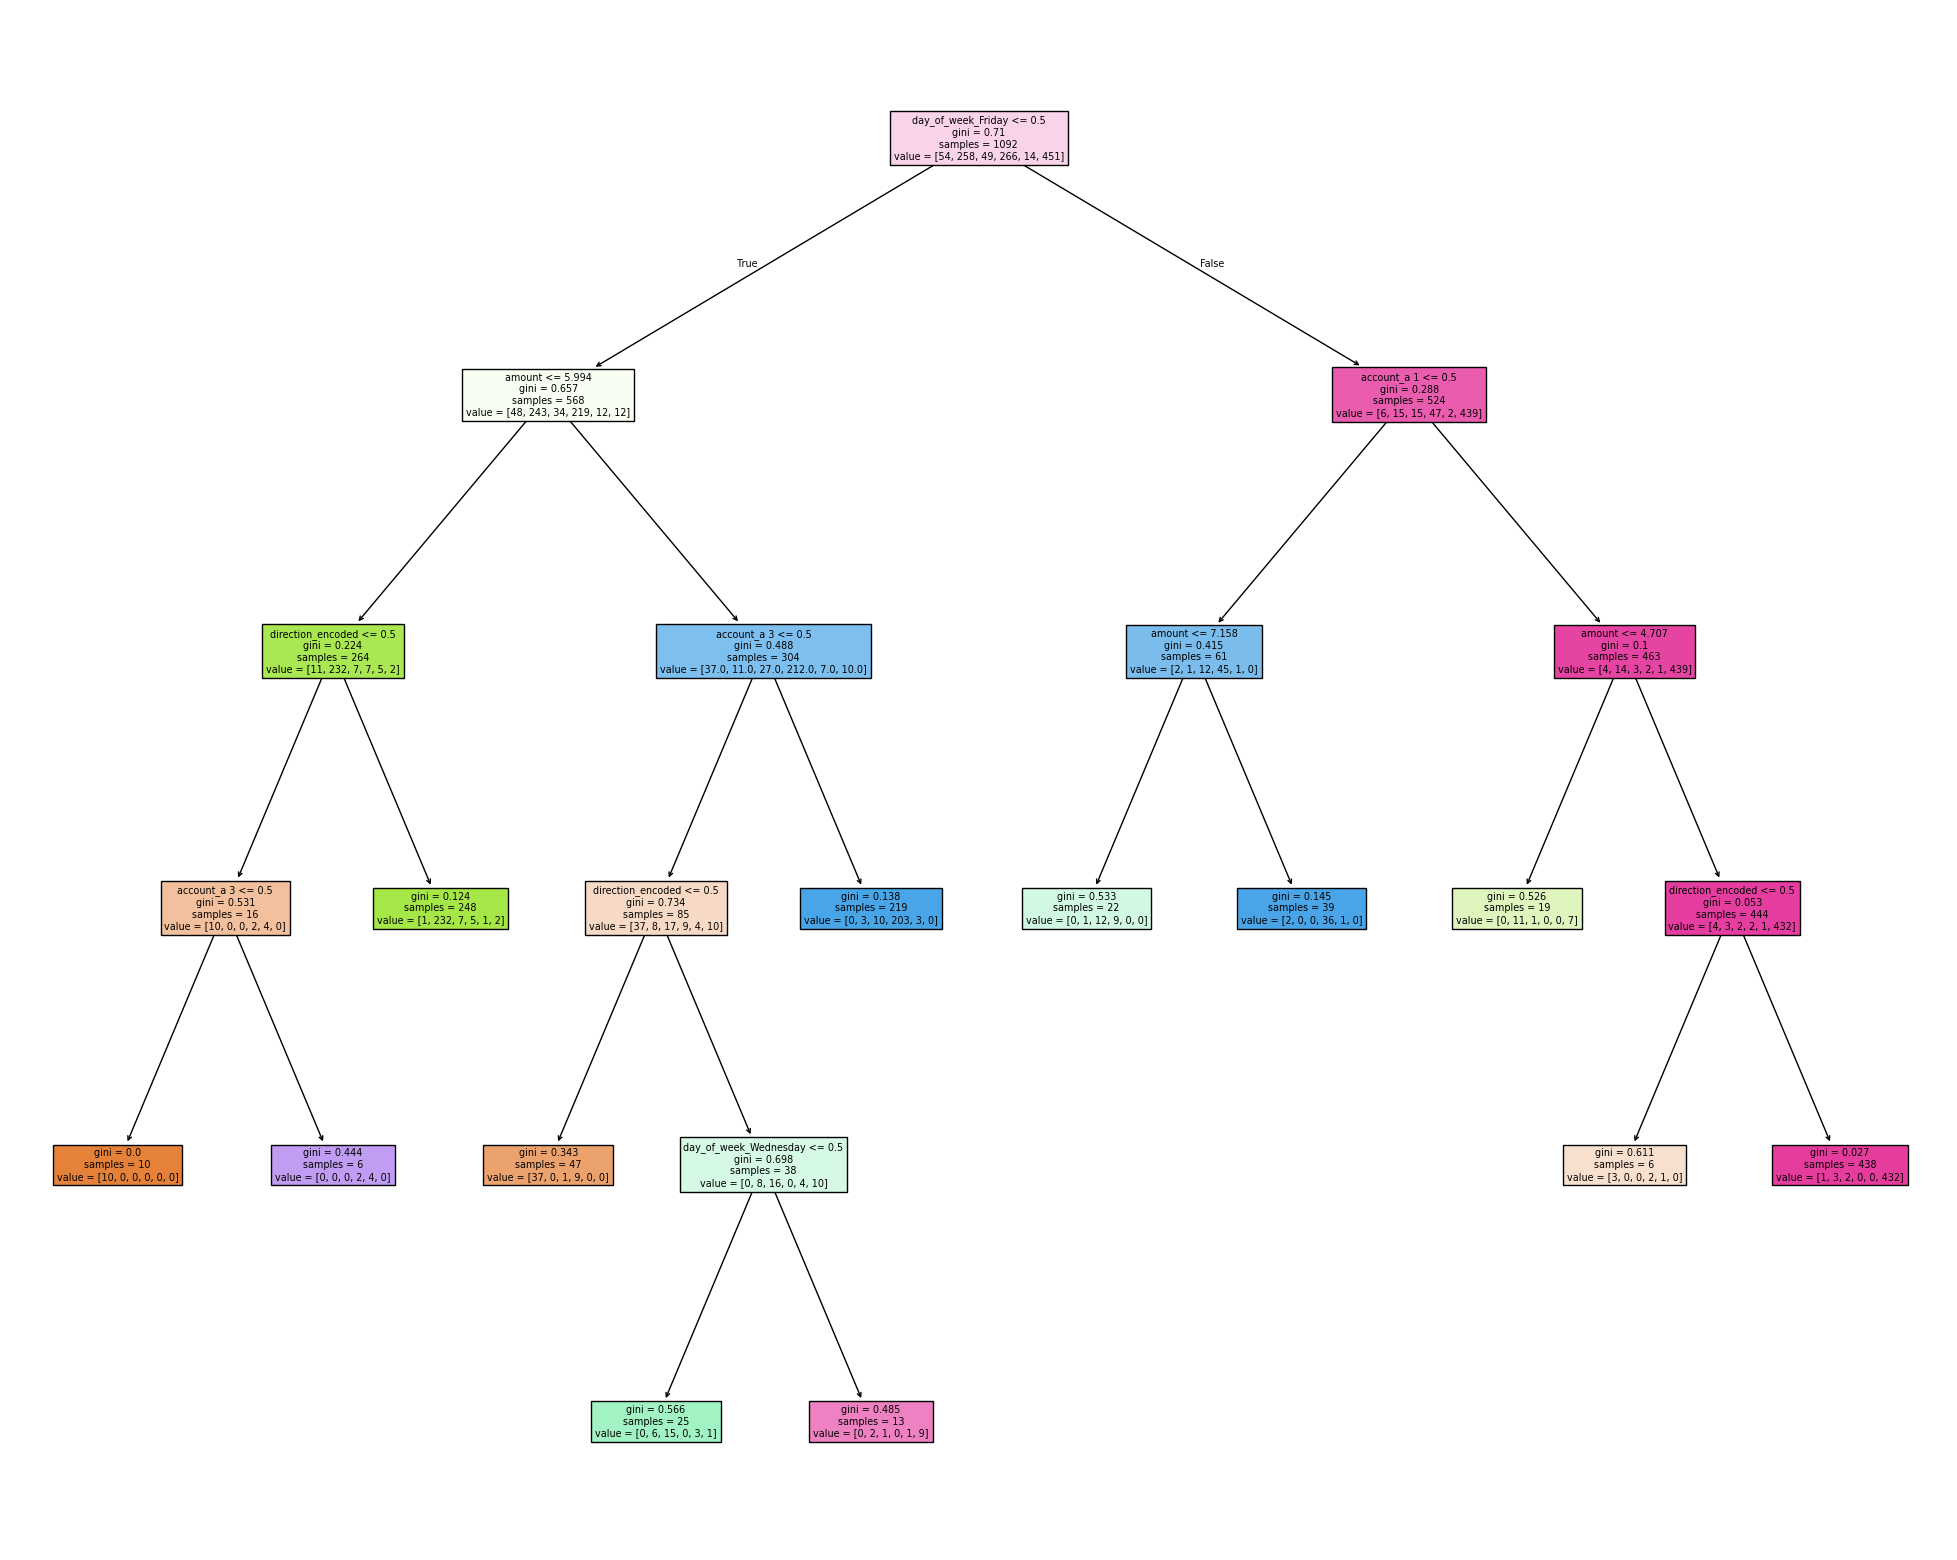

In [9]:
# Training a Decision Tree Classifier
m = DecisionTreeClassifier(max_leaf_nodes=12)
m.fit(X_train, y_train)

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(m, feature_names=X_train.columns, filled=True)

# Printing the accuracy of the Decision Tree prediction
print("decision tree prediction", (m.predict(X_test) == y_test).sum() / len(y_test))


In [10]:
# Function to calculate feature importance for Random Forest
def rf_feat_importance(m, df):
    return pd.DataFrame(
        {"cols": df.columns, "imp": m.feature_importances_}
    ).sort_values("imp", ascending=False)


fi = rf_feat_importance(m, X_train)
fi[:10]


,cols,imp
8,day_of_week_Friday,0.397064
16,amount,0.294545
0,account_a 1,0.125747
2,account_a 3,0.097316
17,direction_encoded,0.075739
12,day_of_week_Wednesday,0.009589
5,account_b 4,0.000000
6,account_b 5,0.000000
7,account_c 6,0.000000
4,account_a 8,0.000000


In [11]:
# Function to perform grid search for optimal hyperparameters
def optimal_param_search(model, param_grid):
    grid_search = GridSearchCV(
        model,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=2,
    )
    grid_search.fit(X_train, y_train)

    optimal_params = grid_search.best_params_
    print("Best Score = ", grid_search.best_score_)
    print("Optimal Parameters:", optimal_params)
    return optimal_params


Logistic Regression


In [12]:
param_grid_lr = {"C": [0.1, 1, 10, 100], "max_iter": [100, 1000, 10000]}

optimal_params_lr = optimal_param_search(LogisticRegression(), param_grid_lr)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/workaccount/Documents/coding/accounting_project/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/workaccount/Documents/coding/accounting_project/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

[CV] END ................................C=0.1, max_iter=100; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=1000; total time=   0.0s
[CV] END ................................C=0.1, max_iter=100; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=1000; total time=   0.0s
[CV] END ................................C=0.1, max_iter=100; total time=   0.0s
[CV] END ................................C=0.1, max_iter=100; total time=   0.0s
[CV] END ................................C=0.1, max_iter=100; total time=   0.1s
[CV] END ..............................C=0.1, max_iter=10000; total time=   0.1s
[CV] END ...............................C=0.1, max_iter=1000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=1000; total time=   0.0s
[CV] END ..............................C=0.1, max_iter=10000; total time=   0.0s
[CV] END ..............................C=0.1, max_iter=10000; total time=   0.0s
[CV] END ...................

/Users/workaccount/Documents/coding/accounting_project/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/workaccount/Documents/coding/accounting_project/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

[CV] END .................................C=10, max_iter=100; total time=   0.0s
[CV] END ................................C=10, max_iter=1000; total time=   0.1s
[CV] END ................................C=10, max_iter=1000; total time=   0.1s
[CV] END ................................C=10, max_iter=1000; total time=   0.1s
[CV] END ................................C=10, max_iter=1000; total time=   0.1s
[CV] END ................................C=10, max_iter=1000; total time=   0.1s
[CV] END ...............................C=10, max_iter=10000; total time=   0.1s
[CV] END ...............................C=10, max_iter=10000; total time=   0.1s
[CV] END ................................C=100, max_iter=100; total time=   0.0s
[CV] END ...............................C=10, max_iter=10000; total time=   0.1s
[CV] END ................................C=100, max_iter=100; total time=   0.0s
[CV] END ................................C=100, max_iter=100; total time=   0.0s
[CV] END ...................

/Users/workaccount/Documents/coding/accounting_project/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/workaccount/Documents/coding/accounting_project/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

[CV] END ..............................C=100, max_iter=10000; total time=   0.1s
[CV] END ..............................C=100, max_iter=10000; total time=   0.1s
[CV] END ..............................C=100, max_iter=10000; total time=   0.1s
[CV] END ...............................C=100, max_iter=1000; total time=   0.1s
[CV] END ..............................C=100, max_iter=10000; total time=   0.1s
[CV] END ..............................C=100, max_iter=10000; total time=   0.1s
Best Score =  0.9065812073226928
Optimal Parameters: {'C': 100, 'max_iter': 1000}


In [13]:
lr_optimal = LogisticRegression(**optimal_params_lr)
lr_optimal.fit(X_train, y_train)
evaluation(lr_optimal, X_test, y_test)


Accuracy = 0.8791208791208791
Precision = 0.8677570146846787
Recall = 0.8791208791208791
F1 Score = 0.8660182756487599
Confusion Matrix:
[[ 10   0   0   3   0   0]
 [  0  53   0   6   0   6]
 [  0   1   3   8   0   0]
 [  1   1   0  64   0   0]
 [  0   1   0   3   0   0]
 [  0   1   2   0   0 110]]


KNN

In [14]:
# Parameter grid for KNN
param_grid_knn = {
    "n_neighbors": [3, 5, 11, 19],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
}

optimal_params_knn = optimal_param_search(KNeighborsClassifier(), param_grid_knn)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weig

In [15]:
# Retraining Gradient Boosting Machine
knn_optimal = KNeighborsClassifier(**optimal_params_knn)
knn_optimal.fit(X_train, y_train)
evaluation(knn_optimal, X_test, y_test)


Accuracy = 0.8644688644688645
Precision = 0.8585657873209013
Recall = 0.8644688644688645
F1 Score = 0.8576767088629926
Confusion Matrix:
[[ 11   1   0   1   0   0]
 [  0  51   0   6   3   5]
 [  1   1   4   5   0   1]
 [  3   3   0  60   0   0]
 [  0   1   1   2   0   0]
 [  0   2   1   0   0 110]]


SVM

In [16]:
# Parameter grid for SVM
param_grid_svm = {
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["rbf", "poly", "sigmoid"],
}
optimal_params_svm = optimal_param_search(SVC(), param_grid_svm)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

KeyboardInterrupt: 

In [17]:

svm_optimal = SVC(**optimal_params_svm)
svm_optimal.fit(X_train, y_train)
evaluation(svm_optimal,X_test,y_test)

NameError: name 'optimal_params_svm' is not defined

Decision Tree

In [18]:
# Parameter grid for Decision Tree
param_grid_dt = {
    "max_depth": [5, 10, 20, 30, None],
    "min_samples_split": [2, 5, 10, 20, 40],
    "min_samples_leaf": [1, 2, 4, 8],
}
optimal_params_dt = optimal_param_search(DecisionTreeClassifier(), param_grid_dt)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, min_samples

In [19]:
dt_optimal = DecisionTreeClassifier(**optimal_params_dt)
dt_optimal.fit(X_train, y_train)
evaluation(dt_optimal, X_test, y_test)


Accuracy = 0.8644688644688645
Precision = 0.8511777790215821
Recall = 0.8644688644688645
F1 Score = 0.8564495945443045
Confusion Matrix:
[[ 10   0   0   3   0   0]
 [  0  53   1   6   0   5]
 [  0   1   5   5   0   1]
 [  2   2   1  61   0   0]
 [  0   1   2   1   0   0]
 [  0   5   1   0   0 107]]


Random Forest


In [20]:
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt"],
}

optimal_params_rf = optimal_param_search(RandomForestClassifier(), param_grid_rf)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Users/workaccount/Documents/coding/accounting_project/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
127 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/workaccount/Documents/coding/accounting_project/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/workaccount/Documents/coding/accounting_project/myenv/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/workaccount/Documents/coding/

Best Score =  0.9239830756985462
Optimal Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [21]:

rf_optimal = RandomForestClassifier(**optimal_params_rf)
rf_optimal.fit(X_train, y_train)
evaluation(rf_optimal,X_test,y_test)

Accuracy = 0.8827838827838828
Precision = 0.873284569836294
Recall = 0.8827838827838828
F1 Score = 0.8709552113309772
Confusion Matrix:
[[ 10   0   0   3   0   0]
 [  0  54   0   6   0   5]
 [  0   1   4   6   0   1]
 [  1   2   0  63   0   0]
 [  0   1   0   3   0   0]
 [  0   2   1   0   0 110]]


GBM

In [ ]:
# Defining the hyperparameter grid for Gradient Boosting Machine
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

optimal_params_gbm = optimal_param_search(GradientBoostingClassifier(), param_grid_gbm )



In [ ]:
gbm_optimal = GradientBoostingClassifier(**optimal_params_gbm)
gbm_optimal.fit(X_train, y_train)
evaluation(gbm_optimal,X_test,y_test)

In [ ]:
# Extracting feature importance from the GBM model
feature_importance = gbm_optimal.feature_importances_
features = X_train.columns

# Creating a DataFrame for feature importances
feature_importance_df = pd.DataFrame(
    {"Feature": features, "Importance": feature_importance}
)

# Sorting the DataFrame based on importance
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("GBM Model Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
def analyze_confidence_threshold(model, X_test, y_test, probabilities, threshold):
    # Initialize counters
    correct_above_threshold = 0
    correct_below_threshold = 0
    incorrect_above_threshold = 0
    incorrect_below_threshold = 0

    # Loop over all instances in the test set
    for i in range(len(X_test)):
        # Get the predicted class and the maximum probability (confidence)
        predicted_class = model.classes_[np.argmax(probabilities[i])]
        max_probability = max(probabilities[i])

        # Check if the prediction is correct
        is_correct = predicted_class == y_test.iloc[i]

        # Increment counters based on confidence and correctness
        if max_probability >= threshold:
            if is_correct:
                correct_above_threshold += 1
            else:
                incorrect_above_threshold += 1
        else:
            if is_correct:
                correct_below_threshold += 1
            else:
                incorrect_below_threshold += 1

    return (
        correct_above_threshold,
        correct_below_threshold,
        incorrect_above_threshold,
        incorrect_below_threshold,
    )


# Set a confidence threshold (for example, 70%)
threshold = 0.8

# Analyze for GBM model
results_gbm = analyze_confidence_threshold(
    gbm_optimal, X_test, y_test, probabilities_gbm, threshold
)

# Print results
print(
    "GBM Results (Correct Above, Correct Below, Incorrect Above, Incorrect Below):",
    results_gbm,
)
